# Results notebook:

This notebook is for plotting results for all the outputs, including the

## Baseline: 
- Performance with increasing number training data
- Number of training data needed for performance to plateau

## Extensions: 

- Extension 1: Monte Carlo Cross Validation 
- Extension 1: K-fold Validation

- Extension 2: Morphological opening Kernel Size tuning
- Extension 2: Laser point and background radius tuning

- Extension 3: Mixture of Substrates


### Baseline: Performance with increasing number training data

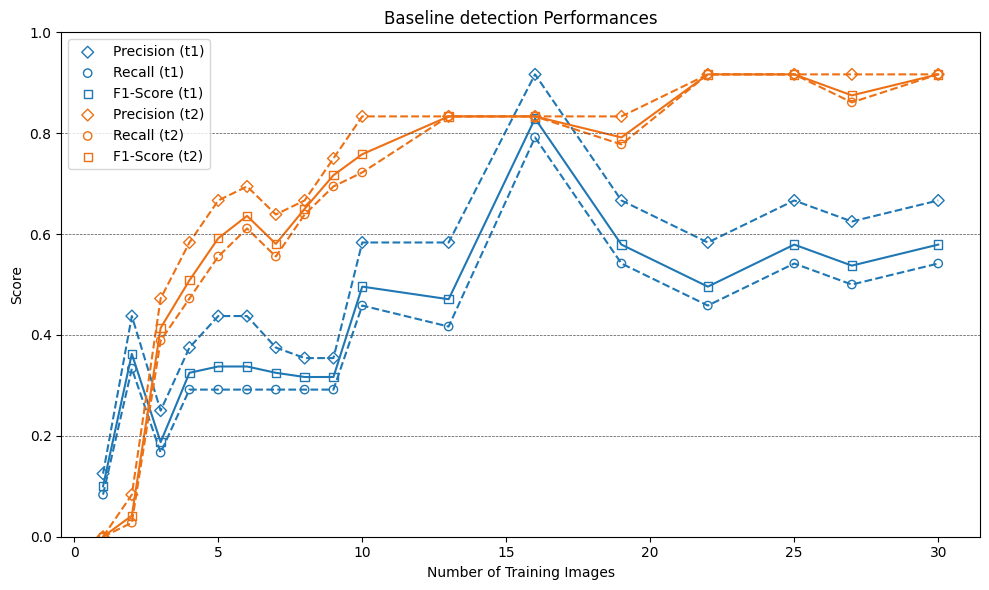

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Load CSV data ---
hard_path = './baseline_t1/baseline_t1.csv'
hard_df = pd.read_csv(hard_path)

soft_path = './baseline_t2/baseline_t2.csv'
soft_df = pd.read_csv(soft_path)

# --- Step 2: Plotting ---
plt.figure(figsize=(10, 6))

# Define colors
blue = '#1f77b4'  # blue for t1 (hard)
orange =  '#ED7014'   #orange for t2 (soft)

# --- HARD, t1, (Blue) ---
plt.plot(hard_df['num_train_images'], hard_df['precision'], linestyle='--', color=blue, zorder=1)
plt.scatter(hard_df['num_train_images'], hard_df['precision'], facecolors='none', edgecolors=blue, marker='D', label='Precision (t1)', zorder=2)

plt.plot(hard_df['num_train_images'], hard_df['recall'], linestyle='--', color=blue, zorder=1)
plt.scatter(hard_df['num_train_images'], hard_df['recall'], facecolors='none', edgecolors=blue, marker='o', label='Recall (t1)', zorder=2)

plt.plot(hard_df['num_train_images'], hard_df['f1_score'], linestyle='-', color=blue, zorder=1)
plt.scatter(hard_df['num_train_images'], hard_df['f1_score'], facecolors='none', edgecolors=blue, marker='s', label='F1-Score (t1)', zorder=2)

# --- SOFT t2, orange) ---
plt.plot(soft_df['num_train_images'], soft_df['precision'], linestyle='--', color=orange, zorder=1)
plt.scatter(soft_df['num_train_images'], soft_df['precision'], facecolors='none', edgecolors=orange, marker='D', label='Precision (t2)', zorder=2)

plt.plot(soft_df['num_train_images'], soft_df['recall'], linestyle='--', color=orange, zorder=1)
plt.scatter(soft_df['num_train_images'], soft_df['recall'], facecolors='none', edgecolors=orange, marker='o', label='Recall (t2)', zorder=2)

plt.plot(soft_df['num_train_images'], soft_df['f1_score'], linestyle='-', color=orange, zorder=1)
plt.scatter(soft_df['num_train_images'], soft_df['f1_score'], facecolors='none', edgecolors=orange, marker='s', label='F1-Score (t2)', zorder=2)

# --- Step 3: Formatting ---
plt.xlabel('Number of Training Images')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Baseline detection Performances')
plt.legend()
plt.grid(axis='y', color='#4E4B51', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("./figures/4.1.1_baseline.png", dpi=300)
plt.show()

### Baseline: Number of training data needed for performance to plateau

The detection performance rises at first with increasing training set size N′ but settles eventually. After 13 annotated images (i.e., 39 LP annotations or about 2 min effort)

**paper**: the detection performance lies ca. eight percent-points below (above) the average of the performances for larger training sets (i.e., N′ > 13). 
**my findings**: the detection performance lies ca. 13% below and 4% below the average of the performances for larger training sets (i.e., N′ > 13) for t1 and t2.

**paper**:The average F-score after thirteen annotated images is 0.86 for T1 and 0.58 for T2.
**my findings**: The average F-score after thirteen annotated images is 0.600 for T1 and 0.875 for T2.

**my findings**: For T1, it plateaus twice. For a steady good result, after 19 trained images it got a percentage point difference of ~3%.
**my findings**: For T2, it fluctuates really strongly in the middle. For a steady good result, after 22 trained images it got a percentage point difference of ~1%.

In [ ]:


# Load results
baseline_t1 = pd.read_csv("./baseline_t1/baseline_t1.csv")  
baseline_t2 = pd.read_csv("./baseline_t2/baseline_t2.csv")  

#calculate percentage point difference, i.e. at this number of training images, how does the f1-score
#sit in comparison to the long term average (acceptable if it is plus minus 8 percentage points)
def pp_diff(df, reference_n=13): 


    # Get F1 score at the reference point (N' = 13)
    f1_at_reference = df[df['num_train_images'] == reference_n]['f1_score'].iloc[0]
    
    # Get F1 scores for larger training sets (N' > 13)
    larger_sets = df[df['num_train_images'] > reference_n]
    avg_f1_large = larger_sets['f1_score'].mean()
    
    # Calculate the difference (percentage points)
    difference = f1_at_reference - avg_f1_large
    
    return difference

#calculating average f1-score after 13 annotated images

def cal_avg(df, n_images):
    
    # Filter for training sets with more than n_images
    larger_sets = df[df['num_train_images'] > n_images]
    
    # Check if we have any data points
    if len(larger_sets) == 0:
        print(f"No training sets found with more than {n_images} images")
        return None
    
    # Calculate average F1 score
    average_f1 = larger_sets['f1_score'].mean()
    
    return average_f1

# Function to compute table of percentage point differences
def compute_diff_table(df):
    result_rows = []

    # Get all unique training sizes
    unique_n = sorted(df['num_train_images'].unique())

    for n in unique_n:
        # Mean F1 at this training size
        f1_at_n = df[df['num_train_images'] == n]['f1_score'].mean()

        # All data with more training images
        larger = df[df['num_train_images'] > n]

        if larger.empty:
            continue

        # Mean F1 for larger training sizes
        avg_larger = larger['f1_score'].mean()

        # Absolute difference (in percentage points)
        abs_diff = abs(f1_at_n - avg_larger)

        result_rows.append({
            'num_train_images': n,
            'f1_score': round(f1_at_n,3),
            'avg_f1_score': round(avg_larger,3),
            'percentage_point_diff': round(abs_diff*100,3)
        })

    return pd.DataFrame(result_rows)

#calculating the percentage point difference after 13 train images
t1_diff = pp_diff(baseline_t1, reference_n=13) #percentage point difference from the long average
t2_diff = pp_diff(baseline_t2, reference_n=13)

print(f"T1 : The F1 score at N' = 13 is {t1_diff*100:.3f} percentage points BELOW the average")
print(f"T2: The F1 score at N' = 13 is {t2_diff*100:.3f} percentage points BELOW the average")

t1_avg = cal_avg(baseline_t1, n_images=13) #average f1-scre after 13 images
t2_avg = cal_avg(baseline_t2, n_images=13)

print(f"T1: The average F1 score after N' = 13 is {t1_avg:.3f}")
print(f"T2: The average F1 score after N' = 13 is {t2_avg:.3f}")

T1 : The F1 score at N' = 13 is -12.917 percentage points BELOW the average
T2: The F1 score at N' = 13 is -4.167 percentage points BELOW the average
T1: The average F1 score after N' = 13 is 0.600
T2: The average F1 score after N' = 13 is 0.875


In [3]:
# Create the difference tables
diff_table_t1 = compute_diff_table(baseline_t1)
diff_table_t2 = compute_diff_table(baseline_t2)

print("T1 plateauing data statistics:")
print(diff_table_t1)

T1 plateauing data statistics:
    num_train_images  f1_score  avg_f1_score  percentage_point_diff
0                  1     0.100         0.442                 34.219
1                  2     0.362         0.447                  8.500
2                  3     0.188         0.466                 27.857
3                  4     0.325         0.477                 15.192
4                  5     0.338         0.489                 15.104
5                  6     0.338         0.502                 16.477
6                  7     0.325         0.520                 19.500
7                  8     0.317         0.543                 22.593
8                  9     0.317         0.571                 25.417
9                 10     0.496         0.582                  8.571
10                13     0.471         0.600                 12.917
11                16     0.829         0.554                 27.500
12                19     0.579         0.548                  3.125
13               

In [4]:
print("T2 plateauing data statistics:")
print(diff_table_t2)

T2 plateauing data statistics:
    num_train_images  f1_score  avg_f1_score  percentage_point_diff
0                  1     0.000         0.686                 68.628
1                  2     0.042         0.729                 68.759
2                  3     0.414         0.752                 33.790
3                  4     0.508         0.771                 26.218
4                  5     0.592         0.785                 19.375
5                  6     0.636         0.799                 16.288
6                  7     0.581         0.821                 24.028
7                  8     0.650         0.840                 18.981
8                  9     0.717         0.855                 13.854
9                 10     0.758         0.869                 11.071
10                13     0.833         0.875                  4.167
11                16     0.833         0.883                  5.000
12                19     0.792         0.906                 11.458
13               

### Extension 1: Monte Carlo Cross Validation 

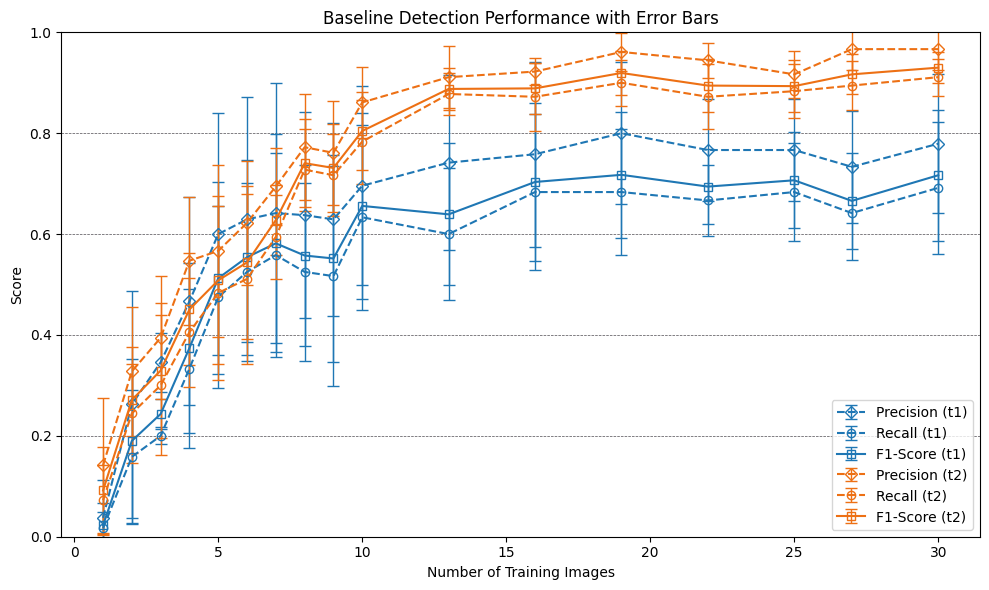

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load data ---
hard_df = pd.read_csv('./mc_t1/mc_t1.csv')
soft_df = pd.read_csv('./mc_t2/mc_t2.csv')

# --- Plot ---
plt.figure(figsize=(10, 6))

# Define colors
blue = '#1f77b4'   # blue for t1 (hard)
orange = '#ED7014' # orange for t2 (soft)

# --- HARD (with hollow markers) ---
plt.errorbar(hard_df['num_train_images'], hard_df['mean_precision'], 
             yerr=hard_df.get('std_precision', None), fmt='--D', 
             color=blue, ecolor=blue, elinewidth=1, capsize=4, 
             markerfacecolor='none', label='Precision (t1)', zorder=2)

plt.errorbar(hard_df['num_train_images'], hard_df['mean_recall'], 
             yerr=hard_df.get('std_recall', None), fmt='--o', 
             color=blue, ecolor=blue, elinewidth=1, capsize=4, 
             markerfacecolor='none', label='Recall (t1)', zorder=2)

plt.errorbar(hard_df['num_train_images'], hard_df['mean_f1_score'], 
             yerr=hard_df.get('std_f1_score', None), fmt='-s', 
             color=blue, ecolor=blue, elinewidth=1, capsize=4, 
             markerfacecolor='none', label='F1-Score (t1)', zorder=2)

# --- SOFT (with hollow markers) ---
plt.errorbar(soft_df['num_train_images'], soft_df['mean_precision'], 
             yerr=soft_df.get('std_precision', None), fmt='--D', 
             color=orange, ecolor=orange, elinewidth=1, capsize=4, 
             markerfacecolor='none', label='Precision (t2)', zorder=2)

plt.errorbar(soft_df['num_train_images'], soft_df['mean_recall'], 
             yerr=soft_df.get('std_recall', None), fmt='--o', 
             color=orange, ecolor=orange, elinewidth=1, capsize=4, 
             markerfacecolor='none', label='Recall (t2)', zorder=2)

plt.errorbar(soft_df['num_train_images'], soft_df['mean_f1_score'], 
             yerr=soft_df.get('std_f1_score', None), fmt='-s', 
             color=orange, ecolor=orange, elinewidth=1, capsize=4, 
             markerfacecolor='none', label='F1-Score (t2)', zorder=2)

# --- Final formatting ---
plt.xlabel('Number of Training Images')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Baseline Detection Performance with Error Bars')
plt.grid(axis='y', linestyle='--', linewidth=0.5, color='#4E4B51')
plt.legend()
plt.tight_layout()
plt.savefig("./figures/5.1_mc_crossval.png", dpi=300)
plt.show()


### Extension 1: K-fold Validation

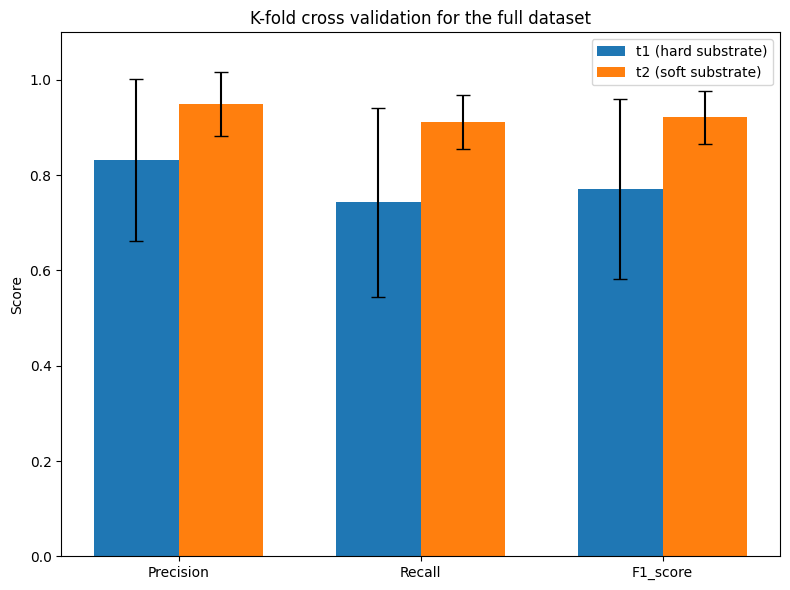

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in both CSV files
hard_df = pd.read_csv('./kfold_t1/kfold_t1.csv')
soft_df = pd.read_csv('./kfold_t2/kfold_t2.csv')

# Extract metric means and stds
metrics = ['precision', 'recall', 'f1_score']

means_hard = [
    hard_df['mean_precision'].iloc[0],
    hard_df['mean_recall'].iloc[0],
    hard_df['mean_f1_score'].iloc[0]
]
stds_hard = [
    hard_df['std_precision'].iloc[0],
    hard_df['std_recall'].iloc[0],
    hard_df['std_f1_score'].iloc[0]
]

means_soft = [
    soft_df['mean_precision'].iloc[0],
    soft_df['mean_recall'].iloc[0],
    soft_df['mean_f1_score'].iloc[0]
]
stds_soft = [
    soft_df['std_precision'].iloc[0],
    soft_df['std_recall'].iloc[0],
    soft_df['std_f1_score'].iloc[0]
]

# Plotting
x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x - width/2, means_hard, width, yerr=stds_hard, capsize=5, label='t1 (hard substrate)')
ax.bar(x + width/2, means_soft, width, yerr=stds_soft, capsize=5, label='t2 (soft substrate)')

ax.set_ylabel('Score')
ax.set_title('K-fold cross validation for the full dataset')
ax.set_xticks(x)
ax.set_xticklabels([m.capitalize() for m in metrics])
ax.set_ylim(0, 1.1)
ax.legend()

plt.tight_layout()
plt.savefig("./figures/5.2_kfold_crossval.png", dpi=300)
plt.show()

### Extension 2: Morphology parameter tuning 

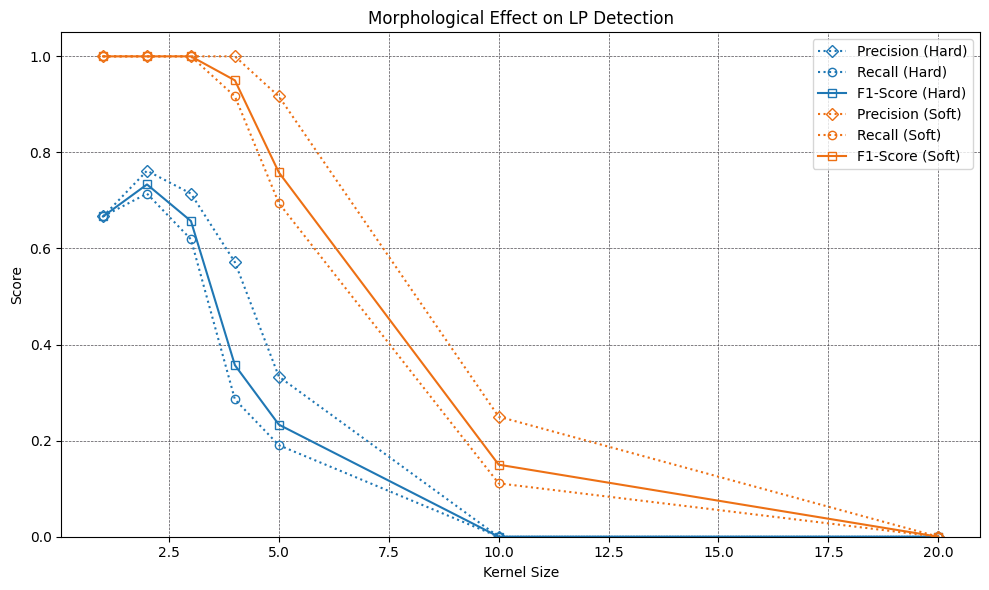

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Colors
blue = '#1f77b4'   # hard
orange = '#ED7014' # soft

# Load data
df1 = pd.read_csv("./morph_t1/morph_t1.csv")
df2 = pd.read_csv("./morph_t2/morph_t2.csv")

# Initialize plot
plt.figure(figsize=(10, 6))

# Plot for morph_t1 (blue, hard)
plt.plot(df1["kernel size"], df1["precision"], linestyle=':', marker='D', markersize=6,
         markerfacecolor='none', color=blue, label='Precision (Hard)')
plt.plot(df1["kernel size"], df1["recall"], linestyle=':', marker='o', markersize=6,
         markerfacecolor='none', color=blue, label='Recall (Hard)')
plt.plot(df1["kernel size"], df1["f1_score"], linestyle='-', marker='s', markersize=6,
         markerfacecolor='none', color=blue, label='F1-Score (Hard)')

# Plot for morph_t2 (orange, soft)
plt.plot(df2["kernel size"], df2["precision"], linestyle=':', marker='D', markersize=6,
         markerfacecolor='none', color=orange, label='Precision (Soft)')
plt.plot(df2["kernel size"], df2["recall"], linestyle=':', marker='o', markersize=6,
         markerfacecolor='none', color=orange, label='Recall (Soft)')
plt.plot(df2["kernel size"], df2["f1_score"], linestyle='-', marker='s', markersize=6,
         markerfacecolor='none', color=orange, label='F1-Score (Soft)')

# Final plot styling
plt.xlabel("Kernel Size")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Morphological Effect on LP Detection")
plt.grid(True, linestyle='--', linewidth=0.5, color='#4E4B51')
plt.legend()
plt.tight_layout()
plt.savefig("./figures/6.1_morphology.png", dpi=300)
plt.show()



Laserpoint radius and background radius tuning

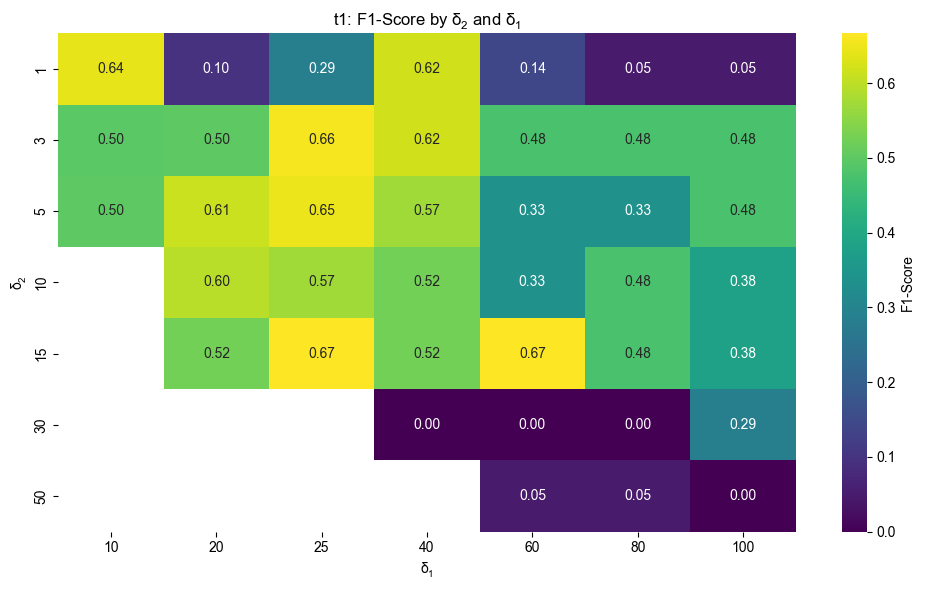

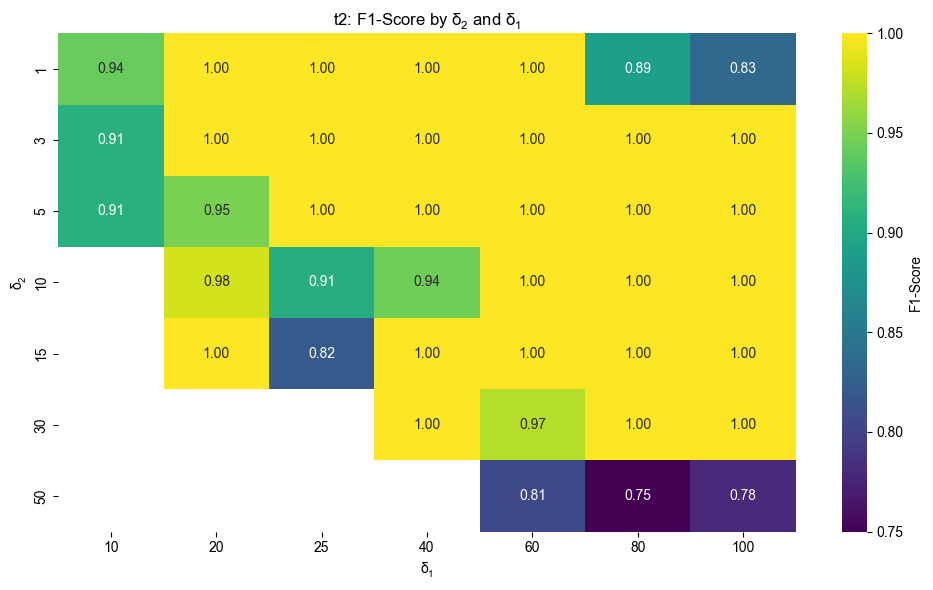

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Clear unsafe fonts
matplotlib.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial', 'Liberation Sans', 'Helvetica'],
    'mathtext.fontset': 'stix',
    'mathtext.default': 'regular',
})

# Load your CSV files
df_t1 = pd.read_csv("./radius_t1/radius_t1.csv")
df_t2 = pd.read_csv("./radius_t2/radius_t2.csv")

# Add a column to label the dataset
df_t1["dataset"] = "t1"
df_t2["dataset"] = "t2"

# Combine both into a single DataFrame if you want to generalize later
df = pd.concat([df_t1, df_t2], ignore_index=True)

# Plot heatmaps for each dataset
for name, subdf in df.groupby("dataset"):
    pivot = subdf.pivot(index="LP_color_radius", columns="Background_color_radius", values="f1_score")

    plt.figure(figsize=(10, 6))
    sns.heatmap(pivot, annot=True, fmt=".2f", cmap="viridis", cbar_kws={"label": "F1-Score"})
    plt.title(f"{name}: F1-Score by LP and Background Radius")
    plt.xlabel(r"$\delta_1$")
    plt.ylabel(r"$\delta_2$")
    plt.title(rf"{name}: F1-Score by $\delta_2$ and $\delta_1$")
    plt.tight_layout()
    plt.savefig(f"./figures/6.2_{name}delta.png", dpi=300)
    plt.show()



### Extension 3: Mixture of substrates

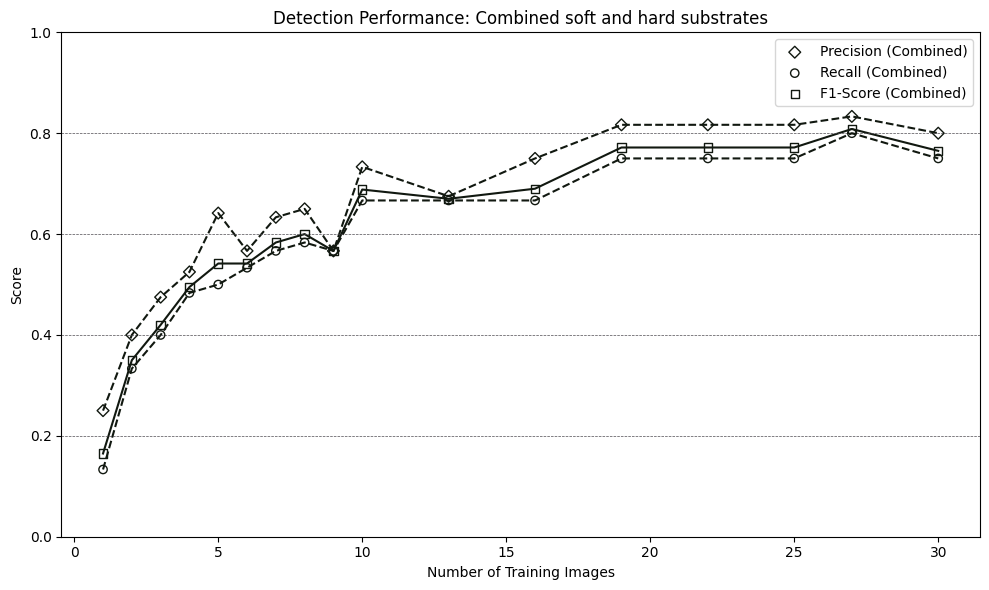

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Step 1: Load CSV data ---
combined_path = './combined_t1t2/combined_t1t2.csv'
combined_hard_df = pd.read_csv(combined_path)

# --- Step 2: Plotting ---
plt.figure(figsize=(10, 6))

# Color 
black = "#111810"

# --- HARD (Orange) ---
plt.plot(combined_hard_df['num_train_images'], combined_hard_df['precision'], linestyle='--', color=black, zorder=1)
plt.scatter(combined_hard_df['num_train_images'], combined_hard_df['precision'], facecolors='none', edgecolors=black, marker='D', label='Precision (Combined)', zorder=2)

plt.plot(combined_hard_df['num_train_images'], combined_hard_df['recall'], linestyle='--', color=black, zorder=1)
plt.scatter(combined_hard_df['num_train_images'], combined_hard_df['recall'], facecolors='none', edgecolors=black, marker='o', label='Recall (Combined)', zorder=2)

plt.plot(combined_hard_df['num_train_images'], combined_hard_df['f1_score'], linestyle='-', color=black, zorder=1)
plt.scatter(combined_hard_df['num_train_images'], combined_hard_df['f1_score'], facecolors='none', edgecolors=black, marker='s', label='F1-Score (Combined)', zorder=2)

# --- Step 3: Formatting ---
plt.xlabel('Number of Training Images')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.title('Detection Performance: Combined soft and hard substrates')
plt.legend()
plt.grid(axis='y', color='#4E4B51', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig("./figures/7_combined.png", dpi=300)
plt.show()

begin loading packages...
train hard...
The selected images for this train set are: ['0828', '0734', '0148', '1134', '0470', '0266', '1139', '1124', '0459', '0555', '1195', '0282', '0956', '0926', '1208', '0738', '1224', '0315', '0455', '0310', '0816', '0178', '0333', '0494', '0859', '0188', '1023', '0700', '0231', '1185', '0590', '1011', '0853', '0942', '0458', '1220', '1106', '0381']
train soft...
The selected images for this train set are: ['0104', '0225', '0662', '0002', '0602', '0127', '0609', '0044', '0156', '0268', '0336', '0003', '0584', '0480', '0456', '0011', '0790', '0001', '0361', '0420', '0204', '0697', '0190', '0026', '0121', '0358', '0253', '0021', '0172', '0302', '0133', '0154', '0607', '0055', '0857', '0717', '0363', '0128', '0081', '0138', '0078', '0383', '0010', '0112', '0804', '0020', '0591', '0261', '0024', '0232', '0187', '0144', '0531', '0167', '0514', '0052', '0592', '0834', '0196', '0027']
Processing Hard substrates
Processing Soft substrates
Calculating means


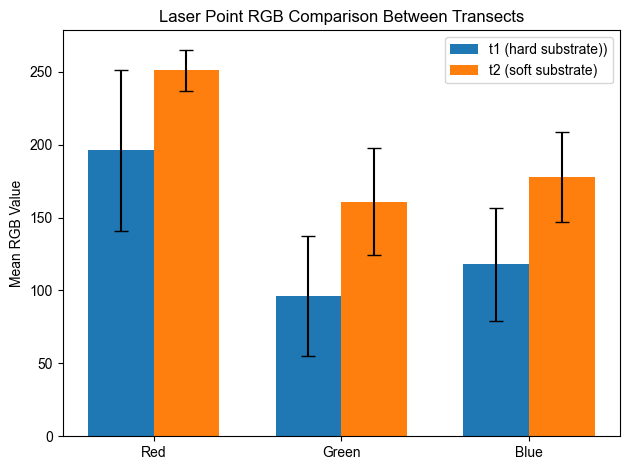

In [3]:
print("begin loading packages...")

import pandas as pd
import os
from DELPHI.LPdetection import LPtrain
import numpy as np
import matplotlib.pyplot as plt

# Hard (T1) and Soft (T2) paths
impath_hard = '/Users/Jasthecoolbean/Desktop/hard/images'
lppath_hard = '/Users/Jasthecoolbean/Desktop/hard/annotations'

impath_soft = '/Users/Jasthecoolbean/Desktop/soft/images'
lppath_soft = '/Users/Jasthecoolbean/Desktop/soft/annotations'

# Train both sets
print("train hard...")
trainer_hard = LPtrain(impath=impath_hard, lppath=lppath_hard, num_images=None)

print("train soft...")
trainer_soft = LPtrain(impath=impath_soft, lppath=lppath_soft, num_images=None)

image_dict_hard = trainer_hard.image_dict
image_dict_soft = trainer_soft.image_dict

def plot_laserpoint_rgb_stats(image_dict_hard, image_dict_soft):
    transect_colors = {"T1": [], "T2": []}  # T1 = hard, T2 = soft

    print("Processing Hard substrates")
    # Process hard (T1)
    for image_id, data in image_dict_hard.items():
        img = data["image"]
        lps = data["laser_points"]
        for x, y in lps:
            if 0 <= int(y) < img.shape[0] and 0 <= int(x) < img.shape[1]:
                rgb = img[int(y), int(x), :]
                transect_colors["T1"].append(rgb)

    # Process soft (T2)
    
    print("Processing Soft substrates")
    for image_id, data in image_dict_soft.items():
        img = data["image"]
        lps = data["laser_points"]
        for x, y in lps:
            if 0 <= int(y) < img.shape[0] and 0 <= int(x) < img.shape[1]:
                rgb = img[int(y), int(x), :]
                transect_colors["T2"].append(rgb)

    t1_colors = np.array(transect_colors["T1"])
    t2_colors = np.array(transect_colors["T2"])

    print("Calculating means")
    means = {
        "T1": np.mean(t1_colors, axis=0),
        "T2": np.mean(t2_colors, axis=0)
    }
    
    print("Calculating stdev")
    stds = {
        "T1": np.std(t1_colors, axis=0),
        "T2": np.std(t2_colors, axis=0)
    }

    channels = ["Red", "Green", "Blue"]
    x = np.arange(len(channels))
    width = 0.35

    print("Plotting figure")
    fig, ax = plt.subplots()
    ax.bar(x - width/2, means["T1"], width, yerr=stds["T1"], label="t1 (hard substrate))", capsize=5)
    ax.bar(x + width/2, means["T2"], width, yerr=stds["T2"], label="t2 (soft substrate)", capsize=5)

    ax.set_ylabel("Mean RGB Value")
    ax.set_title("Laser Point RGB Comparison Between Transects")
    ax.set_xticks(x)
    ax.set_xticklabels(channels)
    ax.legend()
    fig.tight_layout()
    
    plt.savefig("./figures/2.4_rgb.png", dpi=300)


# Call the plot function with both image_dicts
plot_laserpoint_rgb_stats(image_dict_hard, image_dict_soft)